# Trajectory Sim

## Requirements
- Create a 2D "Physics" sim with a projectile
- Store a projectile class with position, velocity, and acceleration
- Update the position based on velocity, velocity on acceleration.
- Apply gravity
- Have the projectil bounce off the ground


In [381]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
# Consts
CONST_ACCEL_GRAVITY = 9.81 
CONST_TERMINAL_VELOCITY = 50.0 # Limit to 50m/s

In [ ]:
class Projectile:
    def __init__(self, init_pos):
        self.position = init_pos
        self.velocity = np.array([0.0, 0.0])  # North down
        self.acceleration = np.array([0.0, 0.0]) # North down
    def __str__(self):
        return f"Projectile: (P: {self.position}) (V: {self.velocity}) (A: {self.acceleration})"
    # Fire the project file by applying a given acceleration to it
    def fire(self, velocity):
        # Add the acceleration to the current one
        self.velocity += velocity

    def update(self, dt):
        self.update_acceleration(dt)
        self.update_velocity(dt)
        self.update_position(dt)

    # Physics Updating

    def update_position(self,dt):
        pos_change = self.velocity * dt
        new_pos = self.position + pos_change
        new_pos = self.check_ground(new_pos)
        self.position = new_pos
        
    def update_velocity(self, dt):
        vel_change = self.acceleration * dt
        self.velocity += vel_change

    def update_acceleration(self, dt):
        self.acceleration -= self.acceleration * 0.5
        self.acceleration[1] -= 9.81

    # Returns a safe position after applying ground check
    def check_ground(self, check_pos):
        new_pos = check_pos
        if check_pos[1] <= 0:
           new_pos[1] = 0.0 # Freeze at ground         
           self.velocity[1] = -self.velocity[1] * 0.5 # 50% effiency on bounce
        return new_pos      


In [383]:
# Simulate

projectile = Projectile([0, 5])

projectile.fire([100.0, 50.0])
dt = 0.01 # 100Hz

t_end = 10 # Simulate 10s

states = []

while t_end > 0:
    t_end = t_end - dt
    projectile.update(dt)
    states.append(projectile.position)


print(states[0])
print(states[-1])


[1.       5.499019]
[1.001000e+03 2.314125e-01]


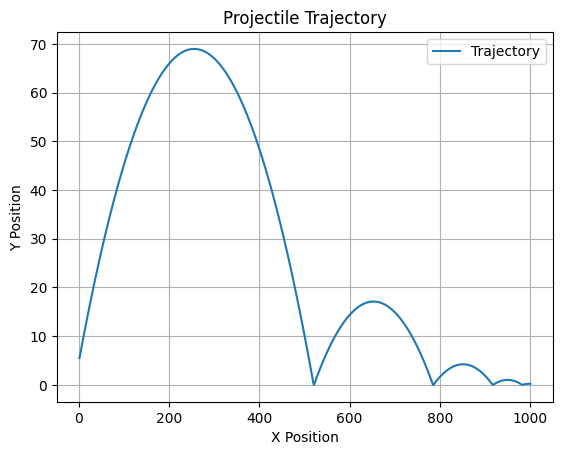

In [384]:

# Extract x and y positions
x_positions = [pos[0] for pos in states]
y_positions = [pos[1] for pos in states]

# Plot x vs y (trajectory)
plt.plot(x_positions, y_positions, label="Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Projectile Trajectory")
plt.legend()
plt.grid(True)
plt.show()

